<a href="https://colab.research.google.com/github/jar8-stack/Rotacion-de-clientes/blob/main/Rotaci%C3%B3n_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
customer_data = pd.read_csv('Churn_Modelling.csv')

In [ ]:
columns = customer_data.columns.values.tolist()
print(columns)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [ ]:
dataset = customer_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
dataset =  dataset.drop(['Geography', 'Gender'], axis=1)

In [ ]:
Geography = pd.get_dummies(customer_data.Geography).iloc[:,1:]
Gender = pd.get_dummies(customer_data.Gender).iloc[:,1:]

In [ ]:
dataset = pd.concat([dataset,Geography,Gender], axis=1)

In [ ]:
X =  dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0) 
classifier.fit(X_train, y_train) 
predictions = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions )) 
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8635


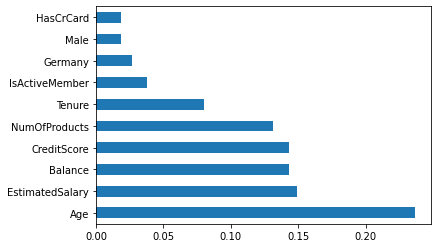

In [ ]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')